# Introduction to Machine Learning (CSCI-UA.473)

### Homework 1: Linear Models
#### Due: October 2nd, 2023 at 11:59PM


#### Name: Pinzhi Huang
#### Email: ph2239@nyu.edu

### Z Disease Dataset

The Z dataset contains ten baseline variables (age, sex, BMI, average blood pressure, and six blood serum measurements) and a quantitative measure of disease progression one year after baseline. Specifically, it comprises a total of 442 samples, where each sample has 10 input features and a target value representing the quantitative measure of disease Z progression.

In [458]:
import pandas as pd

# Load the entire dataset from the CSV file
data = pd.read_csv('/Users/eddiehanqz/Desktop/FML2023_HW1_Dataset.csv')

# Separate the features, target values, and feature names
X = data.drop('target', axis=1)
y = data['target'].values
feature_names = X.columns.tolist()
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-7.284269e-18,2.348549e-17,-2.087320e-16,-4.571507e-17,-9.293722e-18,4.420798e-17,2.135044e-18,2.913707e-17,9.143013e-17,1.431736e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


### Question 1: Data Visualization (15 points)
**Task 1.1 (5 points):** Create a scatter plot to visualize the relationship between BMI (Body Mass Index) and disease Z progression.

* Analyze the scatter plot and describe whether there appears to be a positive or negative correlation, or if no clear correlation is evident.
* Can we confidently infer a person's disease Z status using BMI as the only input variable? Explain your reasoning and any potential caveats.

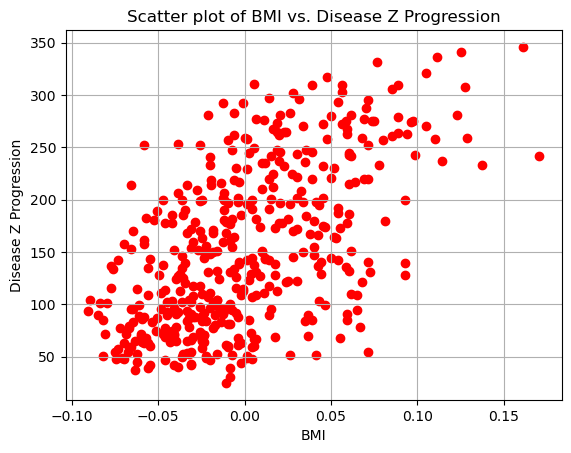

In [459]:
# Add code here
import matplotlib.pyplot as plt

plt.scatter(X.bmi, y, color='red')
plt.title('Scatter plot of BMI vs. Disease Z Progression')
plt.xlabel('BMI')
plt.ylabel('Disease Z Progression')
plt.grid(True)
plt.show()

Given the scatter plot, they appear to be a positive correlation.

**Task 1.2 (5 points):** Create a histogram to visualize the distribution of age among Z patients.

* Does the histogram reveal any noticeable peaks, clusters, or trends?

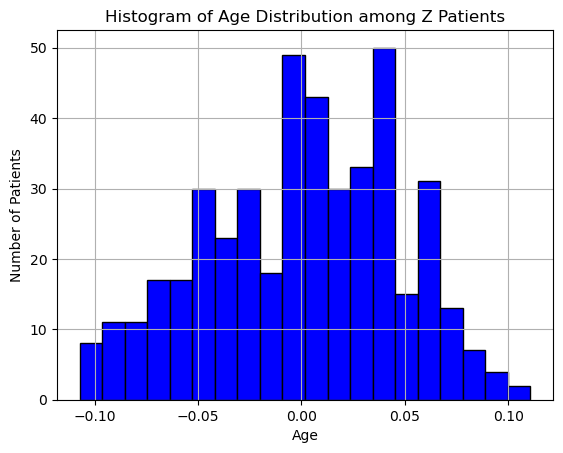

In [491]:
# Add code here
plt.hist(X.age, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Age Distribution among Z Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.show()

**Task 1.3 (5 points):** The box plot is a graphical representation that allows you to visually assess the distribution of values and identify potential differences between the two groups. If you're unfamiliar with box plots or need further guidance, you can refer to this [resource](https://www.data-to-viz.com/caveat/boxplot.html) on box plots for a detailed explanation and examples.

Construct a box plot to compare the progression of Z in male and female patients. How does the progression differ between males and females, as revealed by the box plot?

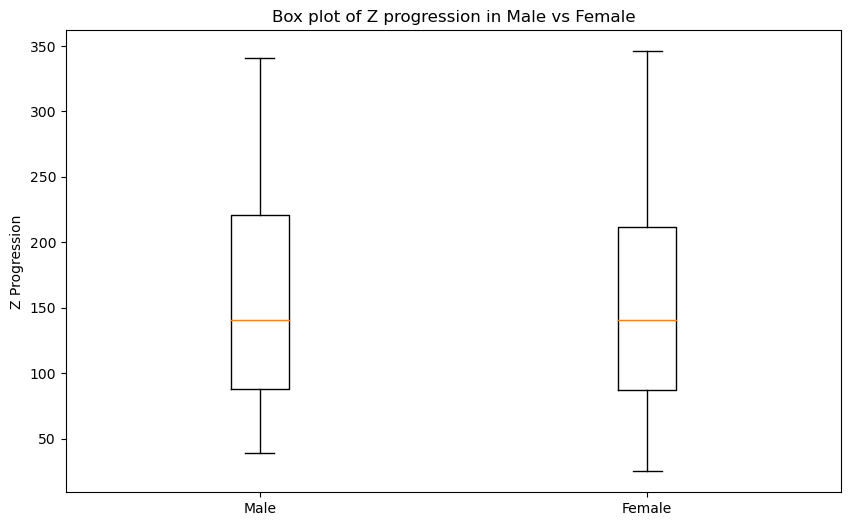

In [461]:
# Add code here
import numpy as np
data = pd.read_csv('/Users/eddiehanqz/Desktop/FML2023_HW1_Dataset.csv')
Z_male = data[data['sex'] > 0]['target']
Z_female = data[data['sex'] <1]['target']
plt.figure(figsize=(10, 6))
plt.boxplot([Z_male, Z_female], labels=['Male', 'Female'])
plt.title('Box plot of Z progression in Male vs Female')
plt.ylabel('Z Progression')
plt.show()


According to the box plot, the progression does not differ males and females

### Question 2: Linear, Ridge, and Lasso Regression (8 points)

**Task 2.1 (2 points):** Split the dataset into training and testing sets (80/20\%) split.

In [462]:
import sklearn
from sklearn import metrics
from sklearn import model_selection
from sklearn import datasets
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
import numpy as np


data = data.dropna()

#Split the dataset:
traindata, testdata = model_selection.train_test_split(data, test_size=0.2, random_state=42)

train_in=traindata.iloc[:,:-1]
train_out=traindata.iloc[:,-1]
test_in=testdata.iloc[:,:-1]
test_out=testdata.iloc[:,-1]

**Task 2.2 (2 points):** Linear regression

A linear regression model is a linear function of the parameters of the model. Its output $y$ is a real number or a real vector, depending on the task definition. That is:
$$\beta = \underset{\beta}{\text{argmin}}\sum_{i=1}^n\left(Y_i - X_i \beta\right)^2$$


* $X_i = [X_1^{(1)}\ldots X_i^{(p)}]$
* $\beta_0,\ldots,\beta_p$ are the coefficients for the features.
* $x_{ji}$ represents the values of the j-th feature for the i-th observation.
* $y_i$ is the target value for the i-th observation.

In [463]:
linear_model=LinearRegression().fit(train_in, train_out)
linear_pre_out = linear_model.predict(test_in)

**Task 2.3 (2 points) :** Ridge Regression is a regularized linear regression with an added L2 regularization term to the linear regression cost function.

$$\beta = \underset{\beta}{\text{argmin}}\sum_{i=1}^n\left(Y_i - X_i \beta\right)^2 + \lambda \|\beta\|^2_2$$

* $\lambda$ is the regularization hyper-parameter.

In [464]:
ridge_model= Ridge(alpha=1).fit(train_in, train_out)
ridge_pre_out = ridge_model.predict(test_in)

**Task 2.4 (2 points):** Lasso Regression is a regularized linear regression with an added L1 regularization term to the linear regression cost function.

$$\beta = \underset{\beta}{\text{argmin}}\sum_{i=1}^n\left(Y_i - X_i \beta\right)^2 + \lambda |\beta|$$

In [465]:
lasso_model = Lasso(alpha=1).fit(train_in, train_out)
lasso_pre_out = lasso_model.predict(test_in)

### Question 3: Model Analysis (15 points)

**Task 3.1 (5 points):** Visualize the coefficients of the Linear, Ridge, and Lasso models.
- What will be the impact of increase in the strength of s1 in linear regression?
- Among the three models, which one exhibits a more pronounced reliance on the BMI feature?

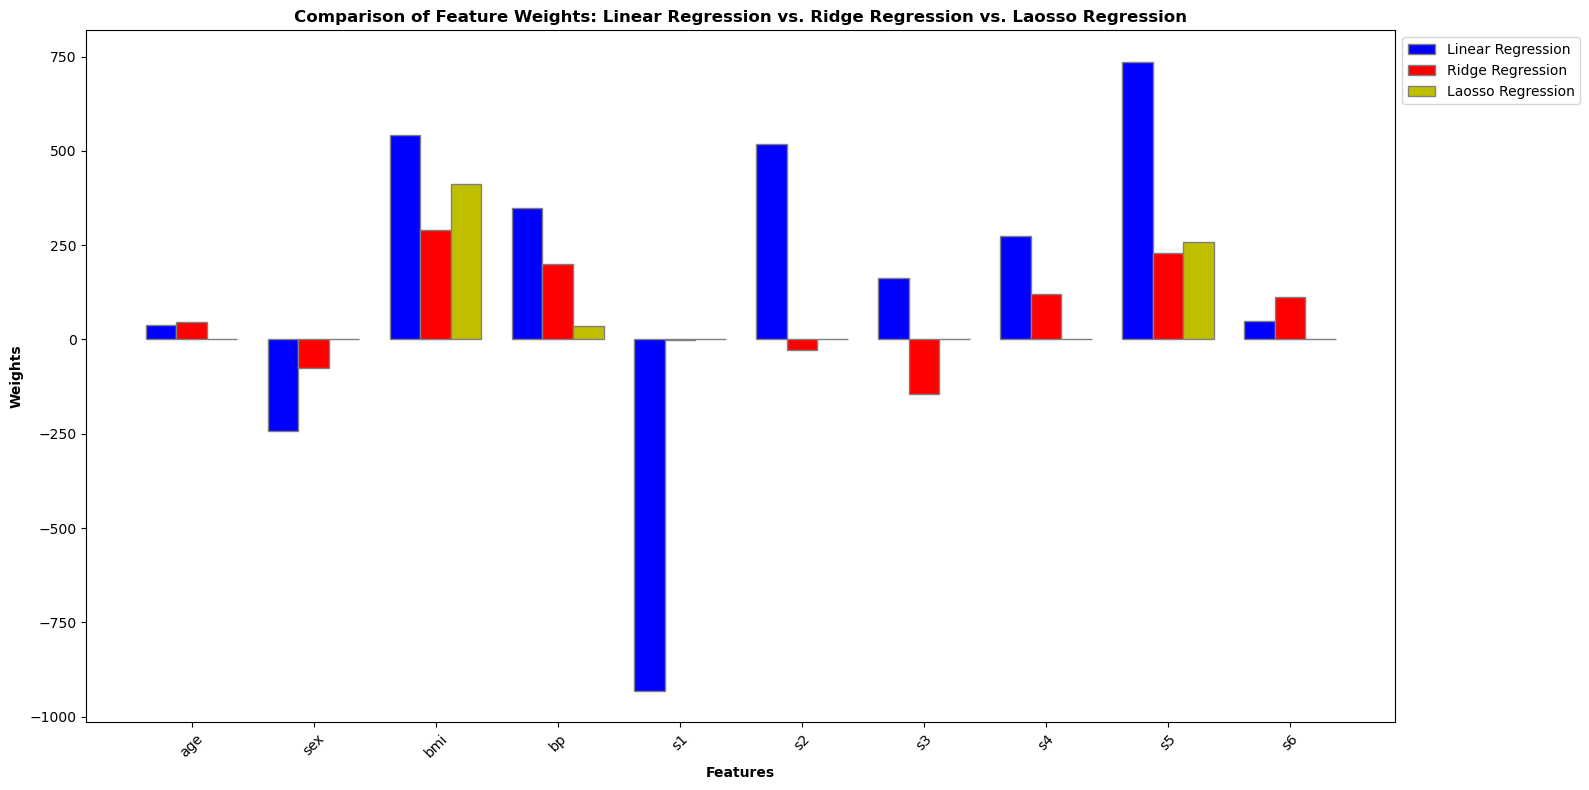

Coefficient of s1 in linear regression:  542.4287585162906
Coefficient of s1 in ridge regression:  -0.5303095901050583
Coefficient of s1 in lasso regression:  0.0
BMI coefficients: Linear: 542.4287585162906, Ridge: 291.33883165003624, Lasso: 413.4318479231426
For Linear Regression, the BMI coefficients weights ammong other coefficients is 14.11%
For Ridge Regression, the BMI coefficients weights ammong other coefficients is 23.35%
For Lasso regression, the BMI coefficients weights ammong other coefficients is 58.53%


In [512]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(feature_names)) 

# Linear Regression weights
y1 =linear_model.coef_

# Ridge Regression weights
y2 = ridge_model.coef_

y3 = lasso_model.coef_

plt.figure(figsize=(16, 8)) 

bar_width = 0.25  


r1 = np.arange(len(y1))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, y1, width=bar_width, color='b', edgecolor='grey', label='Linear Regression')
plt.bar(r2, y2, width=bar_width, color='r', edgecolor='grey', label='Ridge Regression')
plt.bar(r3, y3, width=bar_width, color='y', edgecolor='grey', label='Laosso Regression')


plt.xlabel('Features', fontweight='bold')
plt.ylabel('Weights', fontweight='bold')
plt.title('Comparison of Feature Weights: Linear Regression vs. Ridge Regression vs. Laosso Regression', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(y1))], feature_names, rotation=45) 


plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)


plt.tight_layout()  
plt.show()


#it makes no sense to compare them
print("Coefficient of s1 in linear regression: ", linear_model.coef_[2])
print("Coefficient of s1 in ridge regression: ", ridge_model.coef_[4])
print("Coefficient of s1 in lasso regression: ", lasso_model.coef_[4])

BMI_lin = linear_model.coef_[2]
BMI_rid = ridge_model.coef_[2]
BMI_las = lasso_model.coef_[2]
print(f"BMI coefficients: Linear: {BMI_lin}, Ridge: {BMI_rid}, Lasso: {BMI_las}")


print("For Linear Regression, the BMI coefficients weights ammong other coefficients is"+ " {:.2%}".format(round(BMI_lin/np.sum(np.absolute(linear_model.coef_)), 4)))
print("For Ridge Regression, the BMI coefficients weights ammong other coefficients is"+ " {:.2%}".format(round(BMI_rid/np.sum(np.absolute(ridge_model.coef_)), 4)))
print("For Lasso regression, the BMI coefficients weights ammong other coefficients is"+ " {:.2%}".format(round(BMI_las/np.sum(np.absolute(lasso_model.coef_)), 4)))


If we look at the absolute impact of the prediction, Linear regression has the most pronounced reliance on the BMI feature, but if we look at the relative impact among other variables, Lasso regression has the most pronunced reliance on the BMI feacture.

In general, Lasso regression relies on BMI feature the most to predict the target.

**Task 3.2 (5 points):** Cross-validation involves dividing the available data into multiple subsets or folds to ensure that the model is evaluated on different parts of the data. This helps in obtaining a more accurate estimate of how the model would perform on unseen data. Compare the cross validation scores between Linear, Ridge, and Lasso regression models using a bar plot.

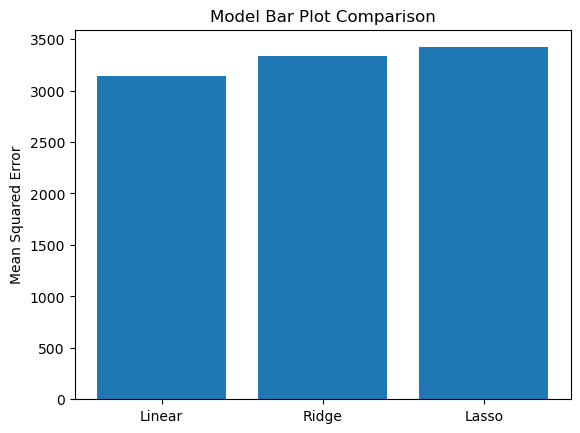

In [514]:
linear=LinearRegression()
ridge=Ridge(alpha=0.5)
lasso=Lasso(alpha=0.5)

lin_scores = model_selection.cross_val_score(linear, train_in, train_out, cv=5, scoring='neg_mean_squared_error')
ridge_scores = model_selection.cross_val_score(ridge, train_in, train_out, cv=5, scoring='neg_mean_squared_error')
lasso_scores = model_selection.cross_val_score(lasso, train_in, train_out, cv=5, scoring='neg_mean_squared_error')

score_mean=[np.mean(-lin_scores),np.mean(-ridge_scores), np.mean(-lasso_scores)]
model = ['Linear', 'Ridge', 'Lasso']
plt.bar(model, score_mean)
plt.title('Model Bar Plot Comparison')
plt.ylabel('Mean Squared Error')
plt.show()

**Task 3.3 (5 points):** Conduct a grid search for both Lasso and Ridge regression models, and then visualize the differences in results obtained before and after the grid search using a bar plot.
- What are the obtained regularization strength parameters for both models?
- Did the grid search improve model performance?

Ridge regularization strength parameter: {'alpha': 0.07}, best cross validation score: 3121.93990519646,
improved 6.487239260981147% compared to the pre-grid_search one
Lasso regularization strength parameter: {'alpha': 0.08}, best cross validation score: 3125.474659574381,
improved 8.61053259759742% compared to the pre-grid_search one


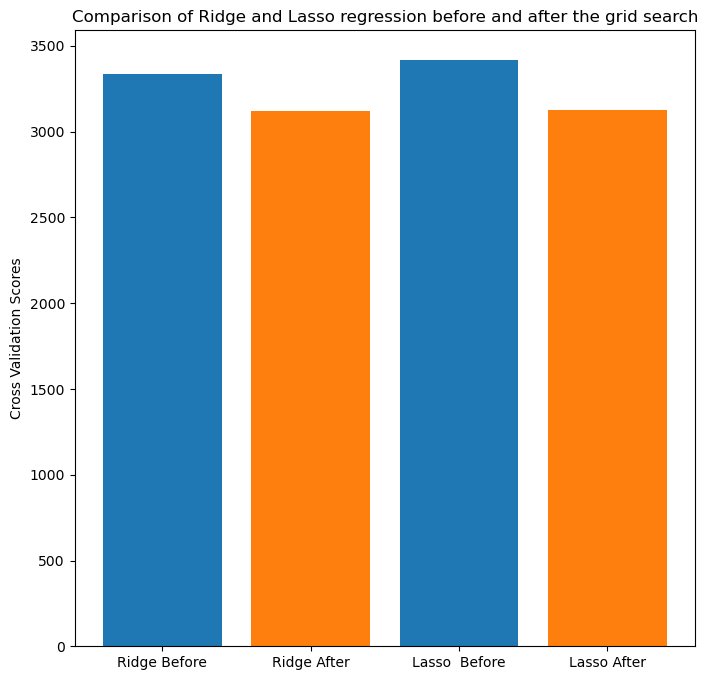

In [515]:
def grid_s(model, tr_in, tr_out):
  param_grid={'alpha':np.arange(0.01,1,0.01)}

  grid_search = model_selection.GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
  grid_search.fit(train_in, train_out)
  best_parameters = grid_search.best_params_
  best_score = -grid_search.best_score_
  best_model = grid_search.best_estimator_

  return best_parameters, best_score, best_model

r_p, r_s, r_m = grid_s(Ridge(), train_in, train_out)
l_p, l_s, l_m = grid_s(Lasso(), train_in, train_out)

score_compare = [np.mean(-ridge_scores), r_s, np.mean(-lasso_scores), l_s]
model = ['Ridge Before', 'Ridge After', 'Lasso  Before', 'Lasso After']

print(f"Ridge regularization strength parameter: {r_p}, best cross validation score: {r_s},\nimproved {100*(np.mean(-ridge_scores)-r_s)/np.mean(-ridge_scores)}% compared to the pre-grid_search one") 
print(f"Lasso regularization strength parameter: {l_p}, best cross validation score: {l_s},\nimproved {100*(np.mean(-lasso_scores)-l_s)/np.mean(-lasso_scores)}% compared to the pre-grid_search one")

plt.figure(figsize=(8, 8))
plt.bar(model, score_compare, color=['#1f77b4', '#ff7f0e'])
plt.ylabel('Cross Validation Scores')
plt.title('Comparison of Ridge and Lasso regression before and after the grid search')
plt.show()

Given the gained result, since after grid search, the cross validation MSE scores for both model decrease, the grid search improves the models performance.

### Question 4: Bias and Variance Tradeoff (12 points)

**Task 4.1 (5 points)** Describe the bias-variance tradeoff, how it affects model performance, and explain the relationship between model complexity and bias/variance. Use markdown cells for explanation.

**Task 4.2 (7 points):** Consider the Z dataset with input features X and target values y. Introduce polynomial features with degrees 1 to 8 to transform the input features into higher-degree polynomials.

To demonstrate the bias-variance tradeoff, fit regression models of to the transformed dataset. Then, create line plots where the x-axis represents the polynomial degrees, and the y-axis represents the Mean Squared Error (MSE) for both the training and testing datasets. Compare the errors between these models.



    

**4.1**:\
\
**Bias-Variance tradeoff**\
Ideally, we want both low bias and low variance, but in practice, decreasing one often increases the other.\
A model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.\
A model with high variance pays a lot of attention to training data (overfiting) and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but have high error rates on test data.\
\
**Relationship between Model Complexity and Bias/Variance:**

Low Complexity: Such models might not capture all the underlying patterns in the data, leading to high bias. However, they will show consistent predictions across different datasets, leading to low variance.\
\
High Complexity: These models can capture intricate patterns and nuances in the training data. Because they fit the training data closely, they often have low bias. However, it can also lead the model to capture noise and overfit the data, leading to high variance. 


In [516]:
from sklearn.preprocessing import PolynomialFeatures

train_error=[]
test_error=[]

degrees = np.arange(1,9,1)

for degree in degrees:
    Polynomial = PolynomialFeatures(degree)
    x_train_Polynomial=Polynomial.fit_transform(train_in)
    x_test_Polynomial=Polynomial.fit_transform(test_in)

    li_model = LinearRegression().fit(x_train_Polynomial, train_out)
    y_train_pre = li_model.predict(x_train_Polynomial)
    y_test_pre = li_model.predict(x_test_Polynomial)

    train_mse=metrics.mean_squared_error(train_out, y_train_pre)
    test_mse=metrics.mean_squared_error(test_out, y_test_pre)

    train_error.append(train_mse)
    test_error.append(test_mse)

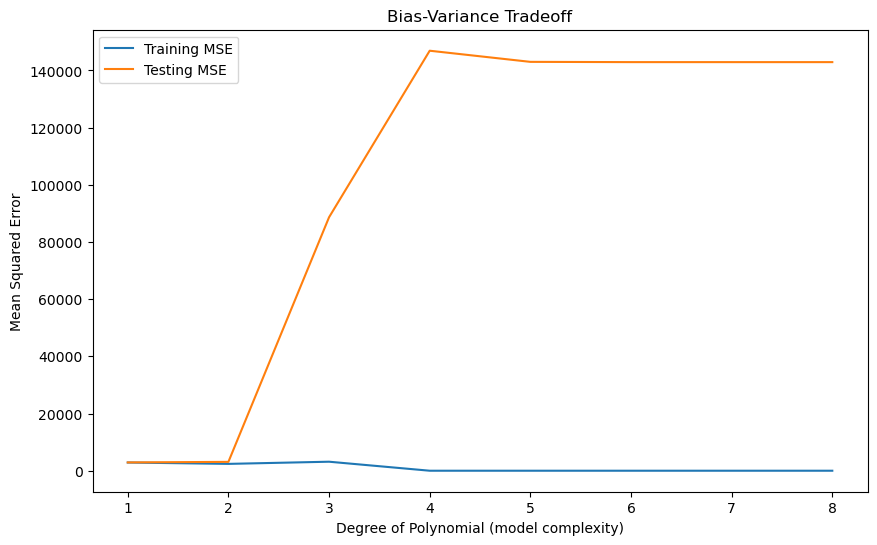

In [517]:
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_error, label='Training MSE')
plt.plot(degrees, test_error, label='Testing MSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Bias-Variance Tradeoff')
plt.show()

When the degree of polynomial > 2, the testing MSE increse drastically, meaning the model overfits the training data and has a high variance. And with the degress of polynomil increases, the training MSE decrease, as the model become better fitting the training data.

#### Z dataset (Classification)

For the last question, we will create a classification version of the Z dataset as follows:

Class 0: Denotes Z progression values that fall below the 50th percentile of the original target variable.

Class 1: Denotes Z progression values that surpass the 50th percentile of the original target variable.

In [518]:
# Shuffle the data
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

# Create the target variable
y = np.where(y > np.percentile(y, 50), 1, 0)

### Question 5: Logistic Regression from Scratch (20 points)


**Task 5.1 (2 points):** Implement the sigmoid function.    
**Task 5.2 (7 points):** Initialize the weights and biases to zeros and implement gradient descent.   
**Task 5.3 (6 points):** Implement the predict and predict_proba functions:
  - predict returns a single discrete category corresponding to the class that has been predicted.
  - predict_proba returns continuous values that represent the likelihood of each input belonging to each class.

In [519]:
import numpy as np

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        # Implement the sigmoid function
        return np.exp(z)/(1+np.exp(z))

    def fit(self, X, y):
        ### Initialize the weights and bias
        num_samples, num_features = X.shape
        self.weights=np.zeros(num_features)
        self.bias = 0
 
        for _ in range(self.num_iterations):
            linear_regression = np.dot(X, self.weights) + self.bias
            prediction = self._sigmoid(linear_regression)
            
            d_weight = (1 / num_samples) * np.dot(X.T, (prediction - y))
            d_bias = (1 / num_samples) * np.sum(prediction - y)
            
            self.weights = self.weights - self.learning_rate * d_weight
            self.bias = self.bias - self.learning_rate * d_bias
        return self

    def predict(self, X):
        linear_regression = np.dot(X,self.weights) + self.bias
        prediction = self._sigmoid(linear_regression)
        category = [1 if i > 0.5 else 0 for i in prediction]
        return category

    def predict_proba(self, X):

        linear_regression = np.dot(X, self.weights) + self.bias
        prediction = self._sigmoid(linear_regression)
        return prediction

    def get_params(self, deep=True):
        return {
            "learning_rate": self.learning_rate,
            "num_iterations": self.num_iterations
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

**Task 5.4 (5 points):** Create an instance of a LogisticRegressionScratch model and train it using a new (80/20%) split of the classification dataset. Afterwards, calculate the accuracy, precision, recall, and F1 score (you can use available machine learning libraries).

In [520]:
### Add code here

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

logis_model = LogisticRegressionScratch().fit(X_train, Y_train)
predictions = logis_model.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, predictions)
precision = metrics.precision_score(Y_test, predictions)
recall = metrics.recall_score(Y_test, predictions)
f1 = metrics.f1_score(Y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5955056179775281
Precision: 0.5416666666666666
Recall: 0.9285714285714286
F1 Score: 0.6842105263157894
